In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/object-detection-with-yolov3'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/object-detection-with-yolov3/yolov3.cfg
/kaggle/input/object-detection-with-yolov3/coco.names
/kaggle/input/object-detection-with-yolov3/weights/yolov3.weights
/kaggle/input/object-detection-with-yolov3/images/cars.jpg
/kaggle/input/object-detection-with-yolov3/images/room2.jpg
/kaggle/input/object-detection-with-yolov3/images/person2.jpg
/kaggle/input/object-detection-with-yolov3/images/eagle.jpg
/kaggle/input/object-detection-with-yolov3/images/room.jpg
/kaggle/input/object-detection-with-yolov3/images/cars2.jpg
/kaggle/input/object-detection-with-yolov3/images/train.jpg
/kaggle/input/object-detection-with-yolov3/images/dog.jpg
/kaggle/input/object-detection-with-yolov3/images/pet-lover.jpg
/kaggle/input/object-detection-with-yolov3/images/herd_of_horses.jpg
/kaggle/input/object-detection-with-yolov3/images/person.jpg
/kaggle/input/object-detection-with-yolov3/images/living room.jpg
/kaggle/input/object-detection-with-yolov3/images/giraffe.jpg
/kaggle/input/object-detec

Importing Libraries

In [2]:
import cv2
import numpy as np


In [3]:
# Load Yolo
net = cv2.dnn.readNet("../input/object-detection-with-yolov3/weights/yolov3.weights", "../input/object-detection-with-yolov3/yolov3.cfg")
classes = []
with open("../input/object-detection-with-yolov3/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [4]:
# Loading image
img = cv2.imread("../input/object-detection-with-yolov3/images/room2.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [5]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

In [6]:
# Showing informations on the screen

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


[[1]
 [2]
 [3]
 [5]]


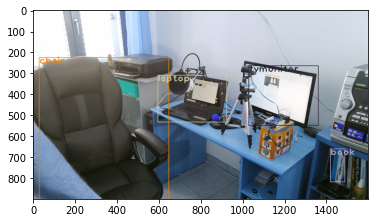

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
        
plt.imshow(img)
plt.show()
cv2.imwrite("../output/kaggle/working/output.jpg",img)
cv2.waitKey()
cv2.destroyAllWindows()